<a href="https://colab.research.google.com/github/MizanMustakim/Big_data_movie_project/blob/main/Big_data_movie_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import seaborn as sns

# Dataset Work

## **Dataset download**
> Dataset link: https://grouplens.org/datasets/movielens/1m/

In [2]:
!wget --no-check-certificate \
https://files.grouplens.org/datasets/movielens/ml-1m.zip

--2021-12-26 12:04:51--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  20.6MB/s    in 0.3s    

2021-12-26 12:04:51 (20.6 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



Extracting the downloaded zip file

In [3]:
local_zip = "/content/ml-1m.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/movie_data')
zip_ref.close()

## **Data Preprocessing**

In [4]:
# Define file directories
MOVIELENS_DIR = '/content/movie_data/ml-1m'
USER_DATA_FILE = '/content/movie_data/ml-1m/users.dat'
MOVIE_DATA_FILE = '/content/movie_data/ml-1m/movies.dat'
RATING_DATA_FILE = '/content/movie_data/ml-1m/ratings.dat'

In [5]:
# Specify User's Age and Occupation Column
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [6]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [7]:
# Read the Ratings File
ratings = pd.read_csv(os.path.join(MOVIELENS_DIR, RATING_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Set max_userid to the maximum user_id in the ratings
max_userid = ratings['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

print(len(ratings), 'ratings loaded')

1000209 ratings loaded


In [8]:
# Save into ratings.csv
ratings.to_csv(RATINGS_CSV_FILE, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])
print('Saved to', RATINGS_CSV_FILE)

Saved to ratings.csv


In [9]:
# Read the Users File
users = pd.read_csv(os.path.join(MOVIELENS_DIR, USER_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])
print(len(users), 'descriptions of', max_userid, 'users loaded.')

6040 descriptions of 6040 users loaded.


In [10]:
# Save into users.csv
users.to_csv(USERS_CSV_FILE, 
             sep='\t', 
             header=True, 
             encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'age_desc', 'occ_desc'])
print('Saved to', USERS_CSV_FILE)

Saved to users.csv


In [11]:
# Read the Movies File
movies = pd.read_csv(os.path.join(MOVIELENS_DIR, MOVIE_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
print(len(movies), 'descriptions of', max_movieid, 'movies loaded.')

3883 descriptions of 3952 movies loaded.


In [12]:
# Save into movies.csv
movies.to_csv(MOVIES_CSV_FILE, 
              sep='\t', 
              header=True, 
              columns=['movie_id', 'title', 'genres'])
print('Saved to', MOVIES_CSV_FILE)

Saved to movies.csv


In [13]:
movie_df = pd.read_csv("/content/movies.csv", sep="\t")
movie_df = movie_df.drop(["Unnamed: 0"], axis=1)

rating_df = pd.read_csv("/content/ratings.csv", sep="\t")
rating_df = rating_df.drop(["Unnamed: 0"], axis=1)

user_df = pd.read_csv("/content/users.csv", sep="\t")
user_df = user_df.drop(["Unnamed: 0"], axis=1)

Checking NAN values in all dataframes

In [15]:
movie_df.isna().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [16]:
rating_df.isna().sum()

user_id         0
movie_id        0
rating          0
timestamp       0
user_emb_id     0
movie_emb_id    0
dtype: int64

In [17]:
user_df.isna().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
age_desc      0
occ_desc      0
dtype: int64

**Movies**

In [18]:
movie_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


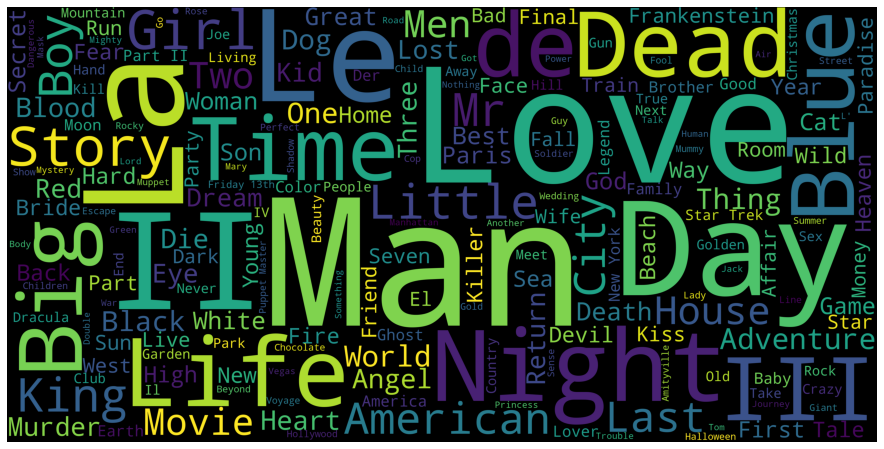

In [19]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movie_df['title'] = movie_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movie_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Ratings**

In [20]:
rating_df.head()

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354


In [21]:
# Get summary statistics of rating
rating_df['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

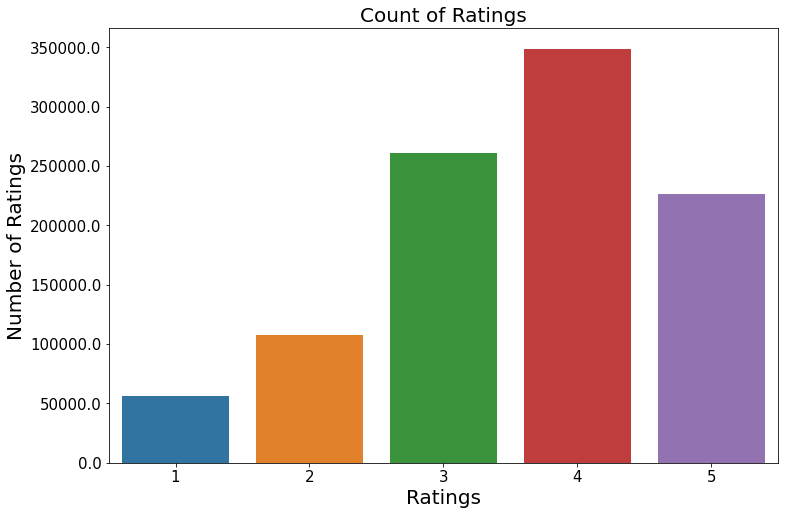

In [22]:
plt.figure(figsize=(12,8))

# Display distribution of rating
ax = sns.countplot(x = rating_df['rating'].fillna(rating_df['rating'].median()), data= rating_df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count of Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

## **Genres**
The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [24]:
# Make a census of the genre keywords
genre_labels = set()
for s in movie_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movie_df, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

The top 5 genres are, in that respect order: Drama, Comedy, Thriller, Action and Romance. I'll show this on a wordcloud too in order to make it more visually appealing.

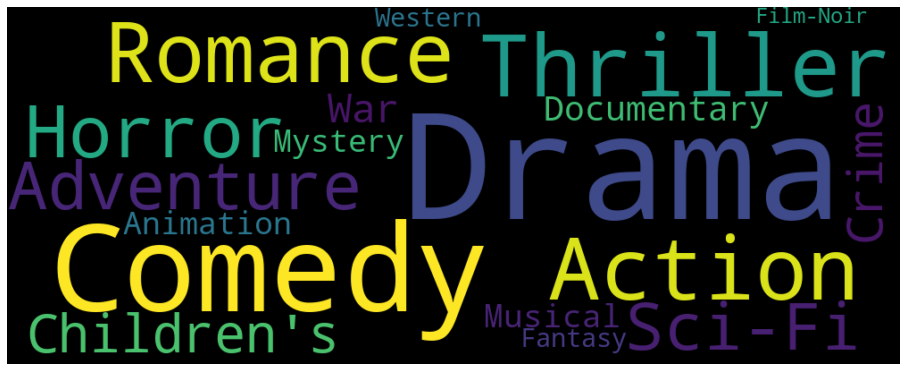

In [25]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Simple Recommenders
> This recommenders offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

In [32]:
# Join all 2 files into one dataframe
dataset = pd.merge(pd.merge(movie_df, rating_df), user_df)

In [33]:
dataset.head()

,movie_id,title,genres,user_id,rating,timestamp,user_emb_id,movie_emb_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']",1,5,978824268,0,0,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),"['Animation', ""Children's"", 'Musical', 'Romance']",1,5,978824351,0,47,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),['Drama'],1,5,978301777,0,149,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",1,4,978300760,0,259,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),"['Drama', 'War']",1,5,978824195,0,526,F,1,10,48067,Under 18,K-12 student


In [37]:
df_1 = dataset[["title", "genres", "rating"]]
df_1.head()

,title,genres,rating
0,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']",5
1,Pocahontas (1995),"['Animation', ""Children's"", 'Musical', 'Romance']",5
2,Apollo 13 (1995),['Drama'],5
3,Star Wars: Episode IV - A New Hope (1977),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",4
4,Schindler's List (1993),"['Drama', 'War']",5


In [38]:
df_1 = df_1.groupby(["title"]).agg(**{"avg_rating":("rating", "mean"), "rate_count": ("rating", "count")}).reset_index()
df_1.head()

,title,avg_rating,rate_count
0,"$1,000,000 Duck (1971)",3.027027,37
1,'Night Mother (1986),3.371429,70
2,'Til There Was You (1997),2.692308,52
3,"'burbs, The (1989)",2.910891,303
4,...And Justice for All (1979),3.713568,199


In [39]:
df_1.shape

(3706, 3)

In [40]:
# Calculate mean of vote average column
C = df_1['avg_rating'].mean()
print(C)

3.2388921779108975


In [41]:
# Calculate the minimum number of votes required to be in the chart, m
m = df_1['rate_count'].quantile(0.90)
print(m)

729.5


In [42]:
# Filter out all qualified movies into a new DataFrame
q_movies = df_1.copy().loc[df_1['rate_count'] >= m]
q_movies.shape

(371, 3)

In [43]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['rate_count']
    R = x['avg_rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [44]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [45]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'rate_count', 'avg_rating', 'score']].head(20)

,title,rate_count,avg_rating,score
2970,"Shawshank Redemption, The (1994)",2227,4.554558,4.229925
3153,Star Wars: Episode IV - A New Hope (1977),2991,4.453694,4.215501
1354,"Godfather, The (1972)",2223,4.524966,4.207205
2901,Schindler's List (1993),2304,4.510417,4.204639
2711,Raiders of the Lost Ark (1981),2514,4.477725,4.199097
3504,"Usual Suspects, The (1995)",1783,4.517106,4.145979
3015,"Sixth Sense, The (1999)",2459,4.406263,4.139179
127,American Beauty (1999),3428,4.317386,4.128147
2990,"Silence of the Lambs, The (1991)",2578,4.351823,4.106356
2894,Saving Private Ryan (1998),2653,4.337354,4.100450


## **Content Based Recommendation model**

In [26]:
# Break up the big genre string into a string array
movie_df['genres'] = movie_df['genres'].str.split('|')
# Convert genres to string value
movie_df['genres'] = movie_df['genres'].fillna("").astype('str')

In [28]:
movie_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),"['Animation', ""Children's"", 'Comedy']"
1,2,Jumanji (1995),"['Adventure', ""Children's"", 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama']"
4,5,Father of the Bride Part II (1995),['Comedy']


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie_df['genres'])
tfidf_matrix.shape

(9742, 177)

I will be using the [Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html) to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.


In [18]:
from sklearn.metrics.pairwise import linear_kernel

In [21]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim[:4, :4])

[[1.         0.31379419 0.0611029  0.05271111]
 [0.31379419 1.         0.         0.        ]
 [0.0611029  0.         1.         0.35172407]
 [0.05271111 0.         0.35172407 1.        ]]


I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [22]:
# Build a 1-dimensional array with movie titles
titles = movie_df['title']
indices = pd.Series(movie_df.index, index=movie_df['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [33]:
genre_recommendations('Good Will Hunting (1997)').head(20)

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
42                How to Make an American Quilt (1995)
45                        When Night Is Falling (1995)
66                                 Bed of Roses (1996)
75     Once Upon a Time... When We Were Colored (1995)
76                           Angels and Insects (1995)
93               Bridges of Madison County, The (1995)
115                       Up Close and Personal (1996)
151                                    Mad Love (1995)
162                         Scarlet Letter, The (1995)
170                               Total Eclipse (1995)
175                       Walk in the Clouds, A (1995)
183                              Before Sunrise (1995)
189                           Circle of Friends (1995)
213                            Immortal Beloved (1994)
232                                 Love Affair (1994)
261                  Picture Bride (Bijo photo) (1994)
262       

In [34]:
genre_recommendations('Toy Story (1995)').head(20)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
5490    Twelve Tasks of Asterix, The (Les douze travau...
6448           TMNT (Teenage Mutant Ninja Turtles) (2007)
8357                                The Lego Movie (2014)
3194                                         Shrek (2001)
7530                               Gnomeo & Juliet (2011)
7805        Pu

In [35]:
genre_recommendations('Saving Private Ryan (1998)').head(20)

909                           Apocalypse Now (1979)
933                    Boot, Das (Boat, The) (1981)
1407          All Quiet on the Western Front (1930)
1503                     Saving Private Ryan (1998)
1826                      Thin Red Line, The (1998)
2216                        Dirty Dozen, The (1967)
2310                        Longest Day, The (1962)
2313                       Tora! Tora! Tora! (1970)
2573                                Red Dawn (1984)
2631                  Force 10 from Navarone (1978)
2716                   Fighting Seabees, The (1944)
2808                            Patriot, The (2000)
3610                      Behind Enemy Lines (2001)
3646                         Black Hawk Down (2001)
3724                        We Were Soldiers (2002)
3856                             Windtalkers (2002)
4114                                    Zulu (1964)
4121      Victory (a.k.a. Escape to Victory) (1981)
4243                       Gods and Generals (2003)
5009    Alex

# TDM data

In [ ]:
tdm_df = pd.read_csv("/content/drive/MyDrive/Big_data_project/data/tmdb_5000_movies.csv")
tdm_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
a = []
for i in range(df_1.shape[0]):
    b = df_1.genres.tolist()[i].split("|")
    for j in b:
        if j not in a:
            a.append(j)
print(a)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


In [ ]:
genre_code = [(i, a.index(i)+1) for i in a]
c = []
for i in range(df_1.shape[0]):
    c.append([])
    b = df_1.genres.tolist()[i].split("|")
    for j in b:
        for k in range(len(genre_code)):
            if genre_code[k][0] == j:
                c[i].append(genre_code[k][1])
df_1["genre_code"] = c

In [ ]:
df_1.head()

,movieId,title,genres,genre_code
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[1, 3, 5]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[4, 6]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[4, 7, 6]"
4,5,Father of the Bride Part II (1995),Comedy,[4]


In [ ]:
df_2 = pd.read_csv("/content/drive/MyDrive/Big_data_project/data/ratings.csv")
df_2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_3 = pd.merge(left=df_1, right=df_2, left_on = "movieId", right_on="movieId")
df_3.head()

,movieId,title,genres,genre_code,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]",1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]",5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]",7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]",15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[1, 2, 3, 4, 5]",17,4.5,1305696483


In [ ]:
df_3.shape

(100836, 7)

In [ ]:
df_4 = pd.read_csv("/content/drive/MyDrive/Big_data_project/data/tmdb_5000_movies.csv", encoding='utf-8')
df_4.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
df_4.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
df_4.genres[1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'